In [ ]:
# Train the model using the fit() method
model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=50,  # Number of training epochs
    batch_size=32,  # Number of samples per gradient update during training
    validation_data=(X_validate, y_validate)  # Validation data for evaluating the model
)

Epoch 1/50
507/507 [==============================] - 248s 452ms/step - loss: 4.2355e-04 - mse: 4.2355e-04 - val_loss: 4.1324e-04 - val_mse: 4.1324e-04
Epoch 2/50
507/507 [==============================] - 228s 450ms/step - loss: 2.6734e-04 - mse: 2.6734e-04 - val_loss: 3.6151e-04 - val_mse: 3.6151e-04
Epoch 3/50
507/507 [==============================] - 234s 461ms/step - loss: 2.2775e-04 - mse: 2.2775e-04 - val_loss: 7.2016e-04 - val_mse: 7.2016e-04
Epoch 4/50
507/507 [==============================] - 228s 450ms/step - loss: 2.4347e-04 - mse: 2.4347e-04 - val_loss: 3.4814e-04 - val_mse: 3.4814e-04
Epoch 5/50
507/507 [==============================] - 232s 459ms/step - loss: 2.0634e-04 - mse: 2.0634e-04 - val_loss: 2.7201e-04 - val_mse: 2.7201e-04
Epoch 6/50
507/507 [==============================] - 229s 452ms/step - loss: 2.2198e-04 - mse: 2.2198e-04 - val_loss: 6.0750e-04 - val_mse: 6.0750e-04
Epoch 7/50
507/507 [==============================] - 239s 471ms/step - loss: 2.0251e-04

In [ ]:
# Print a summary of the model architecture and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 74)            22792     
                                                                 
 lstm_1 (LSTM)               (None, 24, 324)           517104    
                                                                 
 lstm_2 (LSTM)               (None, 24, 276)           663504    
                                                                 
 lstm_3 (LSTM)               (None, 236)               484272    
                                                                 
 dense (Dense)               (None, 1)                 237       
                                                                 
Total params: 1,687,909
Trainable params: 1,687,909
Non-trainable params: 0
_________________________________________________________________


**The given code performs predictions using a trained model (model) on different datasets (X_test, X_train, X_validate). It then applies an inverse transformation to the predicted values using a transformer (t_transformer) to obtain the original scale of the target variable. The inverse transformed predictions are stored in variables with the suffix _inv. The code imports necessary functions from the math and sklearn.metrics modules for calculating metrics such as mean squared error.**

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Perform predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the target variable
y_test_inv = t_transformer.inverse_transform(y_test.reshape((len(y_test), 1)))
y_pred_inv = t_transformer.inverse_transform(y_pred)


In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 34.990


In [ ]:
# Calculate NRMSE
actual_test = y_test_inv
Nrmse_test = rmse / (actual_test.max() - actual_test.min())

0.013973761800382054


In [ ]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test_inv, y_pred_inv)

0.012012685066339688

In [ ]:
# Calculate MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_inv, y_pred_inv)

25.242416092865184

**The given code uses the matplotlib.pyplot library to create a line plot comparing the predicted values (y_pred_inv) and the actual values (y_test_inv).**

In [ ]:
The given code uses the matplotlib.pyplot library to create a line plot comparing the predicted values (y_pred_inv) and the actual values (y_test_inv).

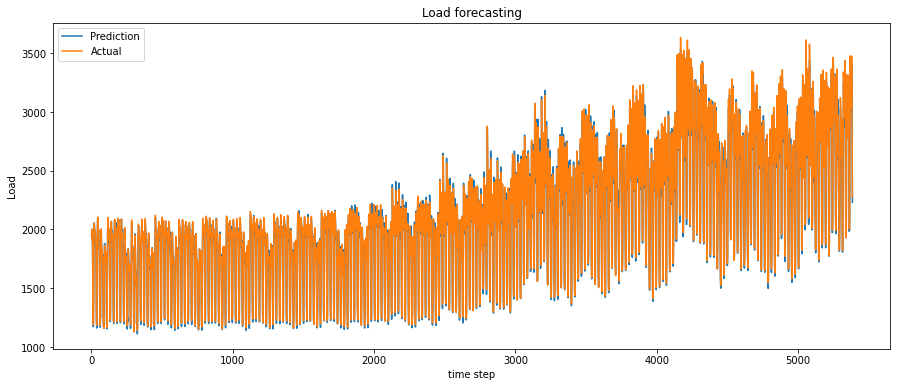

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the predicted values
plt.plot(y_pred_inv, label="Prediction")

# Plot the actual values
plt.plot(y_test_inv, label="Actual")

# Display the legend
plt.legend()

# Set the y-axis label
plt.ylabel('Load')

# Set the x-axis label
plt.xlabel('time step')

# Set the plot title
plt.title('Load forecasting')

# Display the plot
plt.show()

**The given code uses the matplotlib.pyplot library to create a line plot that zooms in on a specific range of data.**

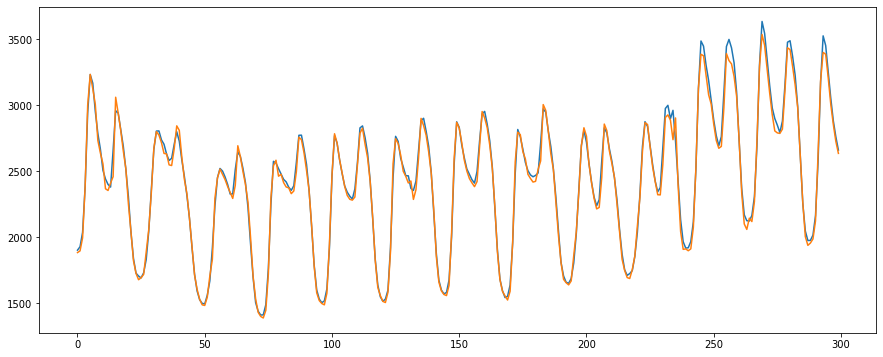

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot a subset of the actual values
plt.plot(y_test_inv[3900:4200])

# Plot a subset of the predicted values
plt.plot(y_pred_inv[3900:4200])

# Display the plot
plt.show()